
# Sentiment Classification

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

In [106]:
train_data = pd.read_csv("SentimentTrain.csv",delimiter=',', encoding='ISO-8859-1')
train_data

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26
...,...,...,...,...,...,...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative,night,31-45,Ghana,31072940,227540.0,137
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative,morning,46-60,Greece,10423054,128900.0,81
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive,noon,60-70,Grenada,112523,340.0,331
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive,night,70-100,Guatemala,17915568,107160.0,167


In [107]:
test_data = pd.read_csv("SentimentTest.csv",delimiter=',', encoding='ISO-8859-1')
test_data.head()

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0


In [108]:
# Check for missing values in training and test datasets
print(train_data.isnull().sum())
print(test_data.isnull().sum())

textID              0
text                1
selected_text       1
sentiment           0
Time of Tweet       0
Age of User         0
Country             0
Population -2020    0
Land Area (Km²)     0
Density (P/Km²)     0
dtype: int64
textID              1281
text                1281
sentiment           1281
Time of Tweet       1281
Age of User         1281
Country             1281
Population -2020    1281
Land Area (Km²)     1281
Density (P/Km²)     1281
dtype: int64


In [109]:
# Drop rows with missing values in the 'text' or 'selected_text' columns
train_data = train_data.dropna(subset=['text', 'selected_text'])

In [110]:
# Drop rows with missing values
test_data = test_data.dropna()

In [111]:
# Separate features and labels
X_train = train_data['text']
y_train = train_data['sentiment']
X_test = test_data['text']
y_test = test_data['sentiment']

# Convert text data to numerical data using TF-IDF
# vectorizer = TfidfVectorizer(max_features=500)
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [112]:
# Label encoding
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(train_data['sentiment'])
y_test_encoded = label_encoder.transform(test_data['sentiment'])

In [113]:
X_test_tfidf.shape

(3534, 26439)

# Decision Tree Classifier

In [114]:
# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# Fit the model
dt_classifier.fit(X_train_tfidf, y_train_encoded)

DecisionTreeClassifier()

In [115]:
# Predict and evaluate
dt_predictions = dt_classifier.predict(X_test_tfidf)
print("Decision Tree Classifier Report:")
print(classification_report(y_test_encoded, dt_predictions))

Decision Tree Classifier Report:
              precision    recall  f1-score   support

           0       0.55      0.57      0.56      1001
           1       0.59      0.60      0.59      1430
           2       0.70      0.67      0.68      1103

    accuracy                           0.61      3534
   macro avg       0.61      0.61      0.61      3534
weighted avg       0.61      0.61      0.61      3534



# SVM Classifier

In [116]:
# Initialize the SVM Classifier
svm_classifier = SVC()

# Fit the model
svm_classifier.fit(X_train_tfidf, y_train_encoded)

SVC()

In [117]:
# Predict and evaluate
svm_predictions = svm_classifier.predict(X_test_tfidf)
print("SVM Classifier Report:")
print(classification_report(y_test_encoded, svm_predictions))

SVM Classifier Report:
              precision    recall  f1-score   support

           0       0.76      0.61      0.68      1001
           1       0.63      0.81      0.71      1430
           2       0.85      0.69      0.76      1103

    accuracy                           0.72      3534
   macro avg       0.75      0.70      0.72      3534
weighted avg       0.74      0.72      0.72      3534



# Random Forest Classifier

In [118]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier = RandomForestClassifier(n_estimators=200)

# Fit the model
rf_classifier.fit(X_train_tfidf, y_train_encoded)

RandomForestClassifier(n_estimators=200)

In [119]:
# Predict and evaluate
rf_predictions = rf_classifier.predict(X_test_tfidf)
print("Random Forest Classifier Report:")
print(classification_report(y_test_encoded, rf_predictions))

Random Forest Classifier Report:
              precision    recall  f1-score   support

           0       0.76      0.56      0.65      1001
           1       0.61      0.79      0.69      1430
           2       0.80      0.69      0.74      1103

    accuracy                           0.70      3534
   macro avg       0.73      0.68      0.69      3534
weighted avg       0.72      0.70      0.70      3534



# XGBoost Classifier

In [131]:
# Initialize the XGBoost Classifier
# xgb_classifier = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_classifier = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',
    n_estimators=200,        # Increase number of trees
    learning_rate=0.1,       # Tune learning rate
    max_depth=6,             # Tune tree depth
    subsample=0.8,           # Proportion of samples used
    colsample_bytree=0.8     # Proportion of features used
)

# Fit the model with encoded labels
xgb_classifier.fit(X_train_tfidf, y_train_encoded)

In [130]:
# Make predictions on the test set
xgb_predictions = xgb_classifier.predict(X_test_tfidf)

# Print classification report using encoded labels
print("XGBoost Classifier Report (encoded):")
print(classification_report(y_test_encoded, xgb_predictions))

XGBoost Classifier Report (encoded):
              precision    recall  f1-score   support

           0       0.76      0.55      0.64      1001
           1       0.61      0.80      0.69      1430
           2       0.82      0.68      0.75      1103

    accuracy                           0.69      3534
   macro avg       0.73      0.68      0.69      3534
weighted avg       0.72      0.69      0.69      3534



# Models Comparison

In [122]:
# Create a dictionary to hold results
results = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

# Decision Tree
results['Model'].append('Decision Tree')
results['Accuracy'].append(accuracy_score(y_test_encoded, dt_predictions))
results['Precision'].append(precision_score(y_test_encoded, dt_predictions, average='weighted'))
results['Recall'].append(recall_score(y_test_encoded, dt_predictions, average='weighted'))
results['F1 Score'].append(f1_score(y_test_encoded, dt_predictions, average='weighted'))

# SVM
results['Model'].append('SVM')
results['Accuracy'].append(accuracy_score(y_test_encoded, svm_predictions))
results['Precision'].append(precision_score(y_test_encoded, svm_predictions, average='weighted'))
results['Recall'].append(recall_score(y_test_encoded, svm_predictions, average='weighted'))
results['F1 Score'].append(f1_score(y_test_encoded, svm_predictions, average='weighted'))

# Random Forest
results['Model'].append('Random Forest')
results['Accuracy'].append(accuracy_score(y_test_encoded, rf_predictions))
results['Precision'].append(precision_score(y_test_encoded, rf_predictions, average='weighted'))
results['Recall'].append(recall_score(y_test_encoded, rf_predictions, average='weighted'))
results['F1 Score'].append(f1_score(y_test_encoded, rf_predictions, average='weighted'))

# XGBoost
results['Model'].append('XGBoost')
results['Accuracy'].append(accuracy_score(y_test_encoded, xgb_predictions))
results['Precision'].append(precision_score(y_test_encoded, xgb_predictions, average='weighted'))
results['Recall'].append(recall_score(y_test_encoded, xgb_predictions, average='weighted'))
results['F1 Score'].append(f1_score(y_test_encoded, xgb_predictions, average='weighted'))

In [123]:
# Create a DataFrame from the results
results_df = pd.DataFrame(results)

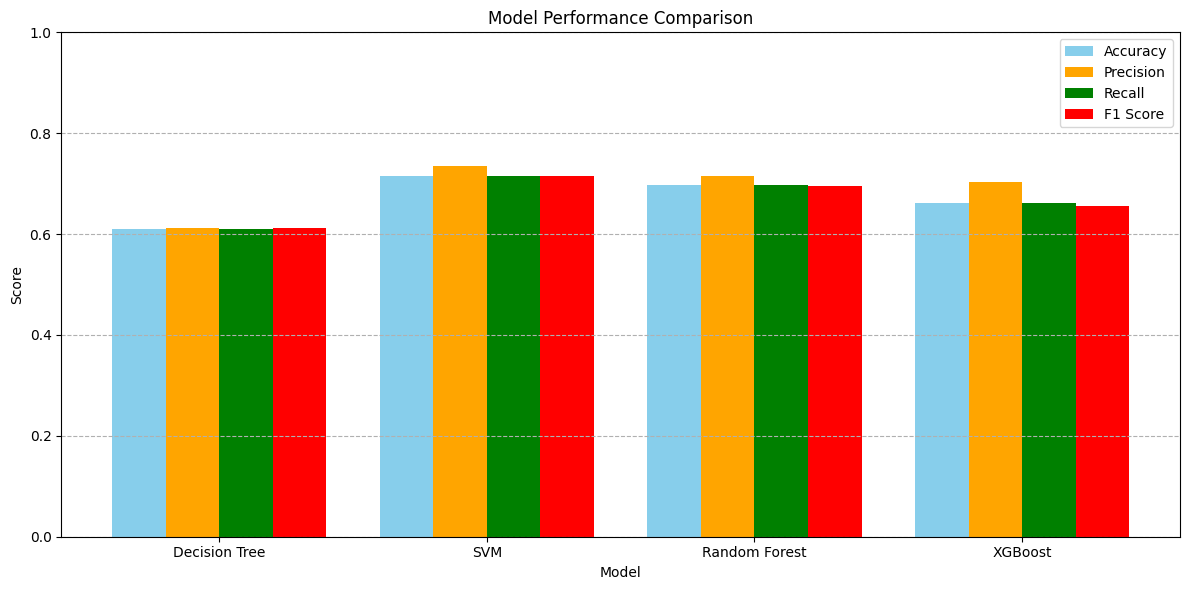

In [124]:
# Set the bar width
bar_width = 0.2
x = range(len(results_df['Model']))

# Plotting
plt.figure(figsize=(12, 6))

# Plot each metric
plt.bar([p - bar_width*1.5 for p in x], results_df['Accuracy'], width=bar_width, label='Accuracy', color='skyblue')
plt.bar([p - bar_width/2 for p in x], results_df['Precision'], width=bar_width, label='Precision', color='orange')
plt.bar([p + bar_width/2 for p in x], results_df['Recall'], width=bar_width, label='Recall', color='green')
plt.bar([p + bar_width*1.5 for p in x], results_df['F1 Score'], width=bar_width, label='F1 Score', color='red')

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(x, results_df['Model'])
plt.ylim(0, 1)  # Score ranges from 0 to 1
plt.legend()
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()